In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
rs = 123

In [3]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [4]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [5]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [6]:
course_df.shape[0]

307

In [7]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [8]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [9]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [10]:
#Plotting word cloud from course titles
titles = ' '.join(title for title in course_df['TITLE'].astype(str))

In [11]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [12]:
stopwords = set(STOPWORDS)

In [13]:
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [14]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white', width = 800, height = 400)
wordcloud.generate(titles)

In [15]:
plt.axis('off')
plt.figure(figsize = (40,20))
plt.tight_layout()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
#Analysing courses genre
index_ml = course_df[(course_df['MachineLearning']==1) & (course_df['BigData']==1)]
ml_bd_courses = index_ml['TITLE']

In [17]:
ml_bd_courses

46     insurance risk assessment with montecarlo meth...
59                               text analytics at scale
184                                          spark mllib
282                       machine learning with big data
Name: TITLE, dtype: object

In [18]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [19]:
genres_sorted = course_df[genres].sum().sort_values(ascending = False)
genres_df = pd.DataFrame(genres_sorted, columns = ['Count'])
genres_df

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


[Text(0, 0, 'BackendDev'),
 Text(1, 0, 'MachineLearning'),
 Text(2, 0, 'Database'),
 Text(3, 0, 'DataAnalysis'),
 Text(4, 0, 'DataScience'),
 Text(5, 0, 'CloudComputing'),
 Text(6, 0, 'BigData'),
 Text(7, 0, 'Python'),
 Text(8, 0, 'FrontendDev'),
 Text(9, 0, 'Containers'),
 Text(10, 0, 'R'),
 Text(11, 0, 'ComputerVision'),
 Text(12, 0, 'Chatbot'),
 Text(13, 0, 'Blockchain')]

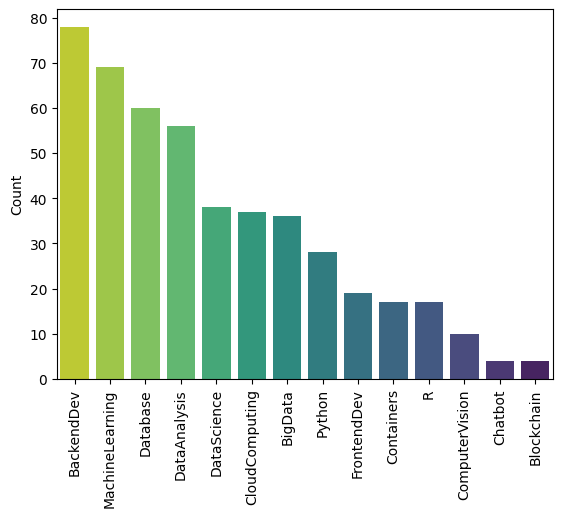

In [20]:
barplot = sns.barplot(x = genres_df.index, y ='Count', data = genres_df, palette = 'viridis_r')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90)

In [21]:
#Analysing course enrollment
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [22]:
ratings_df['rating'].unique()

array([3., 2.])

In [23]:
ratings_df.shape[0]

233306

In [24]:
rating_count_user = pd.DataFrame(ratings_df.groupby('user').size(), columns = ['Count'])
rating_count_user

,Count
user,
2,61
4,44
5,59
7,1
8,3
...,...
2102054,8
2102356,1
2102680,11


In [25]:
rating_count_user.describe()

,Count
count,33901.000000
mean,6.881980
std,5.823548
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,61.000000


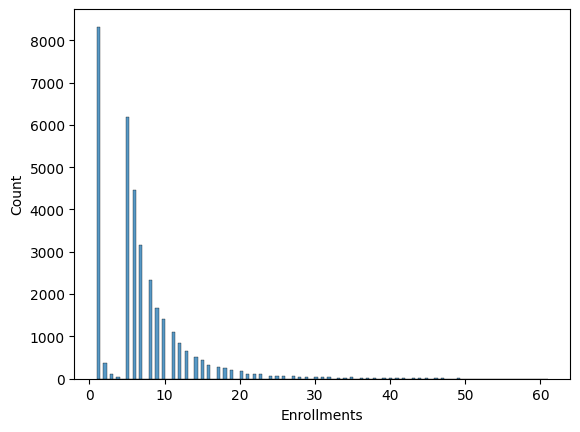

In [33]:
ax = sns.histplot(data=rating_count_user, x = 'Count')
ax.set(xlabel = 'Enrollments')
plt.show()

array([[<Axes: title={'center': 'Count'}>]], dtype=object)

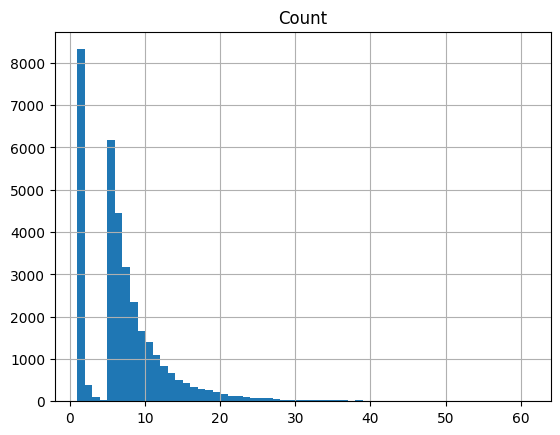

In [26]:
rating_count_user.hist(bins = 60)

In [27]:
top_20_items = pd.DataFrame(ratings_df.groupby('item').size().reset_index().sort_values(by = 0, ascending = False)[:20])
top_20_items = top_20_items.rename(columns = {0:'Ratings', 'item' : 'Course'})
top_20_items

,Course,Ratings
101,PY0101EN,14936
54,DS0101EN,14477
4,BD0101EN,13291
5,BD0111EN,10599
42,DA0101EN,8303
55,DS0103EN,7719
82,ML0101ENv3,7644
18,BD0211EN,7551
56,DS0105EN,7199
1,BC0101EN,6719


In [28]:
name_top_20_items = pd.merge(top_20_items,course_df[['COURSE_ID','TITLE']], how = 'left', left_on = 'Course', right_on = 'COURSE_ID')
name_top_20_items = name_top_20_items[['TITLE', 'Ratings']]
name_top_20_items

,TITLE,Ratings
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [29]:
total_ratings = ratings_df.shape[0]
total_top_20_ratings = name_top_20_items['Ratings'].values.sum()
print('Enrollment percentage of the top 20 courses: {}%'.format(round(total_top_20_ratings*100/total_ratings,2)))

Enrollment percentage of the top 20 courses: 63.3%
